In [45]:
import pandas
import seaborn as sns
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence


# Zadání úkolu
#Naším cílem je zjistit, které indikátory nejvíce ovlivňují cenu, a vytvořit model, který odhadne cenu akcie na základě hodnot finančních indikátorů.
#Jeden z indikátorů je označený jako Y a je poměrem ceny a účetní hodnoty akcie. Hodnota indikátoru je odrazem ceny akcie. Ostatní indikátory jsou následující:

#běžná likvidita (Current Ratio, CR),
#zadluženost (Debt to Assets, DA),
#finanční páka (Financial Leverage, FL)
#provozní zisková marže (Operating Profit Margin, OPM),
#obrat pohledávek (Receivables Turnover, RT),
#obrat celkových aktiv (Total Assets Turnover, TAT).

data = pandas.read_csv("df.csv")
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


In [46]:
# vytvoření korelační matice
#který ukazatel má největší vliv na indikátor Y akcie?
data_corr = data.drop(columns=["Company", "Sector"])
data_corr = pandas.DataFrame(data.drop(columns=["Company", "Sector"])) # vytvoření nového DataFrame
#data_corr.head()
data_corr.corr()
# Jedná se o indikátor FL

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


<Axes: xlabel='Y', ylabel='Count'>

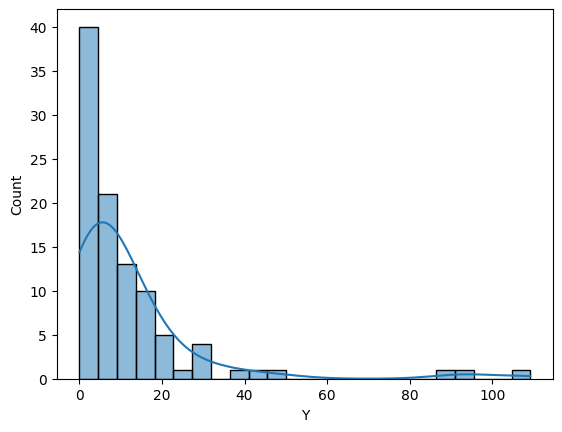

In [47]:
# graf: distribuce hodnot
sns.histplot(data["Y"], kde=True) # data nemají normální rozložení

In [48]:
#Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"

#S využitím modulu scipy vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).
model = smf.ols(formula = formula, data = data_corr)
result = model.fit()
result.summary()

# statisticky nevýznamné koeficienty: p > 0.05; 5%
# CR, DA, RT, DE, PT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        14:14:27   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

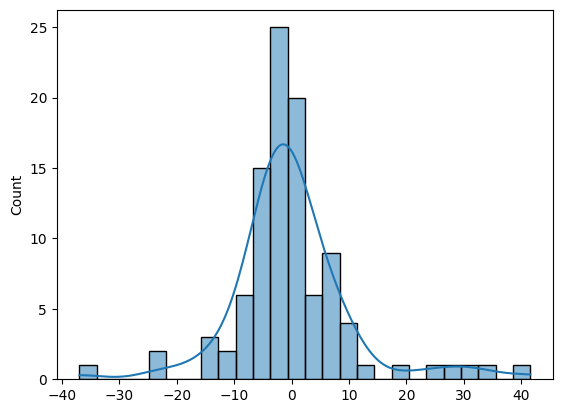

In [49]:
# distribuce reziduí:
sns.histplot(result.resid, kde=True)

In [50]:
# nový model:
formula = "Y ~ FL + OPM + TAT"
model = smf.ols(formula = formula, data = data_corr)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        14:14:27   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).
data_corr["Predicted_Y"] = result.predict(data_corr)
data_corr

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y
0,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,0.502359
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512
2,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,6.944718
3,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,15.708512
4,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,1.701358
...,...,...,...,...,...,...,...,...,...,...
95,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,5.331550
96,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,7.423167
97,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,6.309785
98,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,64.848968


<Axes: xlabel='Predicted_Y', ylabel='Y'>

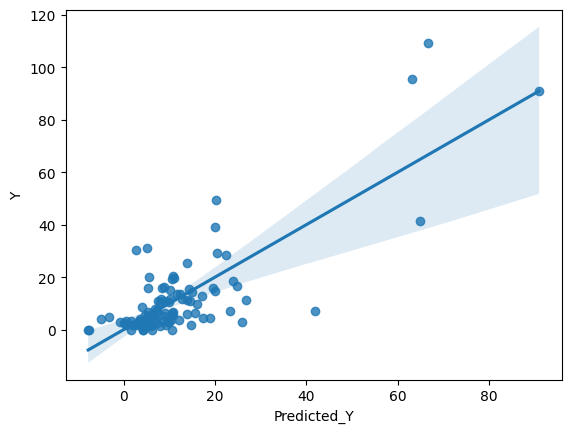

In [52]:
# regresní graf predikovaných a skutečných hodnot
sns.regplot(data = data_corr, x="Predicted_Y", y="Y") # odlehlá pozorování s velkým vlivem

In [53]:
data_corr["Difference_Y"] = data_corr["Predicted_Y"] - data_corr["Y"]
data_corr["Difference_Y"].sort_values(ascending=False)
data_corr.iloc[79:80] # POZN: Dohledání pomocí indexu není šťastné, lepší je seřadit si data podle učitého sloupce a následně odečíst hodnoty!
#data.iloc[78:] # zjištění názvu společnosti

# Největší rozdíl mezi skutečnou hodnotou koeficientu a predikovanou hodnotou koeficientu je u společnosti SYXLy, kde tento rozdíl vychází Difference_Y = 34.809545

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y
79,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.4,41.779545,34.809545


In [54]:
data_corr.sort_values(by = "Difference_Y", ascending=False) # řazení dat podle sloupce

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y
79,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,41.779545,34.809545
98,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,64.848968,23.278968
6,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,25.910015,22.850015
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512,16.096512
56,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,26.676012,15.376012
...,...,...,...,...,...,...,...,...,...,...,...
54,1.38,0.11,2.06,0.1212,28.14,0.87,0.23,31.06,4.01,5.240760,-25.819240
81,1.05,0.15,2.92,0.0436,4.24,0.55,0.43,30.36,15.20,2.750181,-27.609819
39,1.29,0.37,5.15,0.5339,14.32,0.50,1.90,49.43,20.68,20.143170,-29.286830
75,1.23,0.53,21.39,0.1384,44.15,1.87,11.29,95.58,7.52,63.088553,-32.491447


In [55]:
# BONUS1
# Sestav model s využitím robustní regrese. Opět proveď vyřazení koeficinetů, které nejsou statisticky významné, a sestav model pouze s významnými koeficienty. Vlož odhady cen do původních dat a opět najdi potenciálně nejvíce podhodnocenou akcii. Jde v případě robustní regese o stejnou akcii, nebo se akcie liší?

formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model = smf.rlm(formula = formula, data = data_corr)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       91
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 06 Nov 2023                                         
Time:                        14:14:27                                         
No. Iterations:                    37                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4961      3.453     -3.039      0.002     -17.265      -3.728
CR             2.0316      0.801      2.537      0.011       0.462       3.601
DA            -0.4762      6.052     -0.079      0.937     -12.338      11.386
FL             3.6694      0.685      5.360      0.000       2.328       5.011
OPM           16.3810      5.216      3.140      0.002       6.158      26.604
RT            -0.0029      0.014     -0.216      0.829      -0.029       0.024
TAT            5.2670      1.518      3.469      0.001       2.291       8.243
DE            -2.5507      1.335     -1.911      0.056      -5.166       0.065
PT            -0.0878      0.062     -1.412      0.158      -0.210       0.034
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [56]:
# statisticky nevýznamné koeficienty:
# DA, RT, DE, PT

# úprava modelu
formula = "Y ~ CR + FL + OPM + TAT"
model = smf.rlm(formula = formula, data = data_corr)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       95
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 06 Nov 2023                                         
Time:                        14:14:27                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9579      1.924     -5.176      0.000     -13.729      -6.187
CR             2.0977      0.681      3.081      0.002       0.763       3.432
FL             2.4422      0.123     19.840      0.000       2.201       2.683
OPM           13.9913      4.560      3.068      0.002       5.054      22.929
TAT            5.3858      1.290      4.176      0.000       2.858       7.913
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [57]:
data_corr["Predicted_Y_2"] = result.predict(data_corr)
data_corr["Difference_Y_2"] = data_corr["Predicted_Y_2"] - data_corr["Y"]
data_corr["Difference_Y_2"].sort_values(ascending=False)

79    33.280244
6     23.953046
98    21.352966
1     12.943407
24     9.315472
        ...    
54   -26.710671
81   -27.411801
39   -33.941564
75   -38.710918
45   -47.664662
Name: Difference_Y_2, Length: 100, dtype: float64

In [58]:
data_corr. sort_values(by="Difference_Y_2", ascending=False) # řazení hodnot podle sloupce

# Z výsledků vyplývá, že se jedná o stejnou akcii, ale rozdíl hodnot y se nepatrně liší (33,280244 oproti 34.809545)

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y,Predicted_Y_2,Difference_Y_2
79,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,41.779545,34.809545,40.250244,33.280244
6,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,25.910015,22.850015,27.013046,23.953046
98,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,64.848968,23.278968,62.922966,21.352966
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512,16.096512,20.203407,12.943407
24,1.26,0.24,3.14,0.0187,11.43,1.97,0.75,1.91,8.87,14.831219,12.921219,11.225472,9.315472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,1.38,0.11,2.06,0.1212,28.14,0.87,0.23,31.06,4.01,5.240760,-25.819240,4.349329,-26.710671
81,1.05,0.15,2.92,0.0436,4.24,0.55,0.43,30.36,15.20,2.750181,-27.609819,2.948199,-27.411801
39,1.29,0.37,5.15,0.5339,14.32,0.50,1.90,49.43,20.68,20.143170,-29.286830,15.488436,-33.941564
75,1.23,0.53,21.39,0.1384,44.15,1.87,11.29,95.58,7.52,63.088553,-32.491447,56.869082,-38.710918


In [59]:
## BONUS2
#Použij původní (tedy "nerobustní") model a vyčísli Cookovu vzdálenost pro všechny hodnoty. Vyřaď všechny akcie s Cookovou vzdáleností vyšší než 1 a přepočítej regresní model. Nakonec opět najdi potenciálně nejvíce podhodnocenou akcii a podívej se, jestli jde o stejnou akcii jako u předchozích modelů.

#from statsmodels.stats.outliers_influence import OLSInfluence

formula_2 = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model_2 = smf.ols(formula = formula_2, data = data_corr)
result = model_2.fit()
influence = OLSInfluence(result)
data_corr['Cook Distance'] = influence.cooks_distance[0]
data_corr.head()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y,Predicted_Y_2,Difference_Y_2,Cook Distance
0,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,0.502359,-1.447641,1.167348,-0.782652,0.000046
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512,16.096512,20.203407,12.943407,0.037578
2,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,6.944718,-0.835282,7.832927,0.052927,0.000173
3,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,15.708512,9.538512,11.557664,5.387664,0.008283
4,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,1.701358,1.701358,-0.085471,-0.085471,0.000082


In [60]:
# vyřazení hodnot > 1; Cookova vzdálenost
data_corr = data_corr[data_corr['Cook Distance'] < 1]
data_corr

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y,Predicted_Y_2,Difference_Y_2,Cook Distance
0,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,0.502359,-1.447641,1.167348,-0.782652,0.000046
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512,16.096512,20.203407,12.943407,0.037578
2,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,6.944718,-0.835282,7.832927,0.052927,0.000173
3,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,15.708512,9.538512,11.557664,5.387664,0.008283
4,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,1.701358,1.701358,-0.085471,-0.085471,0.000082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.27,0.31,2.77,0.2574,5.28,0.46,0.87,5.05,2.96,6.913755,1.863755,5.549986,0.499986,0.000051
95,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,5.331550,0.151550,4.664812,-0.515188,0.000005
96,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,7.423167,0.023167,4.540074,-2.859926,0.000022
97,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,6.309785,0.319785,5.282266,-0.707734,0.000051


In [61]:
model_2 = smf.ols(formula=formula_2, data=data_corr)
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.76
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.06e-19
Time:                        14:14:28   Log-Likelihood:                -367.74
No. Observations:                  99   AIC:                             753.5
Df Residuals:                      90   BIC:                             776.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0524      5.364     -1.128      0.262     -16.708       4.604
CR             1.4779      1.186      1.246      0.216      -0.878       3.834
DA           -16.4346      9.678     -1.698      0.093     -35.661       2.792
FL             0.8796      1.228      0.716      0.476      -1.561       3.320
OPM           22.9074      7.728      2.964      0.004       7.555      38.260
RT            -0.0003      0.020     -0.013      0.990      -0.040       0.040
TAT            7.9619      2.254      3.533      0.001       3.484      12.440
DE             4.2726      2.560      1.669      0.099      -0.814       9.359
PT            -0.0192      0.093     -0.206      0.837      -0.204       0.166
==============================================================================
Omnibus:                       20.217   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.822
Skew:                           0.649   Prob(JB):                     2.05e-12
Kurtosis:                       6.371   Cond. No.                         640.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# úprava modelu
formula_3 = "Y ~ OPM + TAT"
model_3 = smf.ols(formula = formula_3, data = data_corr)
result = model_3.fit()
result.summary()

# POZN: Zarazilo mě, že hodnota R-squared je hodně nízká oproti modelu se statisticky nevýznamnými koeficienty výše. Má to tak být? Nebo už jsem odebrala moc koeficientů a model už není spolehlivý? Vysvětlení - máme málo dat s "nenormální" distribucí a model je nestabilní

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.558
Date:                Mon, 06 Nov 2023   Prob (F-statistic):            0.00214
Time:                        14:14:28   Log-Likelihood:                -418.99
No. Observations:                  99   AIC:                             844.0
Df Residuals:                      96   BIC:                             851.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8327      4.303     -0.194      0.847      -9.374       7.709
OPM           16.3267     11.820      1.381      0.170      -7.137      39.790
TAT           12.3435      3.424      3.605      0.000       5.548      19.139
==============================================================================
Omnibus:                       93.205   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.514
Skew:                           3.126   Prob(JB):                    4.19e-189
Kurtosis:                      16.085   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
data_corr["Predicted_Y_3"] = result.predict(data_corr)
data_corr["Difference_Y_3"] = data_corr["Predicted_Y_3"] - data_corr["Y"]
data_corr["Difference_Y_3"].sort_values(ascending=False)

data_corr.iloc[55:60]
#data.iloc[56]


C:\Users\jurca\AppData\Local\Temp\ipykernel_20688\2806216470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr["Predicted_Y_3"] = result.predict(data_corr)
C:\Users\jurca\AppData\Local\Temp\ipykernel_20688\2806216470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr["Difference_Y_3"] = data_corr["Predicted_Y_3"] - data_corr["Y"]


,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y,Predicted_Y_2,Difference_Y_2,Cook Distance,Predicted_Y_3,Difference_Y_3
55,5.08,0.00,1.14,0.3189,7.30,0.42,0.00,8.59,14.45,3.978982,-4.611018,10.206520,1.616520,0.000480,9.558160,0.968160
56,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,26.676012,15.376012,18.308412,7.008412,0.100108,39.730180,28.430180
57,1.34,0.22,2.00,0.2434,7.00,0.51,0.44,2.61,4.77,5.046822,2.436822,3.889735,1.279735,0.000140,9.436414,6.826414
58,0.88,0.39,6.98,0.1197,8.49,0.43,2.74,5.90,6.54,13.879057,7.979057,12.925408,7.025408,0.001623,6.429319,0.529319
59,1.26,0.13,1.72,0.1040,8.45,0.65,0.23,1.89,6.69,2.072420,0.182420,1.841722,-0.048278,0.000022,8.888570,6.998570


In [64]:
data_corr.sort_values(by = "Difference_Y_3", ascending = False) # opět řazení podle celého sloupce
# Tentokrát je nejvíce podhodnocená akcie u společnosti n2wGj , Predicted_Y_3 - y = 28.430180

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Predicted_Y,Difference_Y,Predicted_Y_2,Difference_Y_2,Cook Distance,Predicted_Y_3,Difference_Y_3
56,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,26.676012,15.376012,18.308412,7.008412,0.100108,39.730180,28.430180
26,0.92,0.67,0.00,0.1578,26.33,1.99,0.00,0.00,3.01,10.520277,10.520277,4.897612,4.897612,0.014562,26.307298,26.307298
31,0.97,0.19,3.12,0.0406,85.21,2.20,0.60,4.59,8.55,17.291738,12.701738,12.113436,7.523436,0.017993,26.985954,22.395954
24,1.26,0.24,3.14,0.0187,11.43,1.97,0.75,1.91,8.87,14.831219,12.921219,11.225472,9.315472,0.014981,23.789384,21.879384
5,1.41,0.68,0.00,0.1923,7.26,1.16,0.00,0.00,2.31,4.279528,4.279528,1.937972,1.937972,0.000457,16.625425,16.625425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.05,0.15,2.92,0.0436,4.24,0.55,0.43,30.36,15.20,2.750181,-27.609819,2.948199,-27.411801,0.031722,6.668084,-23.691916
39,1.29,0.37,5.15,0.5339,14.32,0.50,1.90,49.43,20.68,20.143170,-29.286830,15.488436,-33.941564,0.093004,14.055882,-35.374118
88,1.19,0.47,32.52,0.1077,0.00,1.92,15.16,90.79,5.51,90.891320,0.101320,83.806746,-6.983254,0.005902,24.625282,-66.164718
75,1.23,0.53,21.39,0.1384,44.15,1.87,11.29,95.58,7.52,63.088553,-32.491447,56.869082,-38.710918,0.253041,24.509334,-71.070666


In [77]:
## BONUS3
# Přidej Sektor (poslední sloupec) jako vysvětlující proměnnou s využitím One Hot Encoding. Podívej se, které sektory mají kladný koeficient a které sektory mají záporný koeficient.

def sector(column):
    if column["Difference_Y"] >= 0:
        return "kladný koeficient"
    else:
        return "záporný koeficient"
data["sector_number"] = data_corr.apply(sector, axis=1)
data


,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,sector_number,kladný koeficient,záporný koeficient
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,záporný koeficient,False,True
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,kladný koeficient,True,False
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,záporný koeficient,False,True
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,kladný koeficient,True,False
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,kladný koeficient,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,yhCH3,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,Healthcare,kladný koeficient,True,False
96,YqdX2,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,Consumer Defensive,kladný koeficient,True,False
97,yUjyz,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,Technology,kladný koeficient,True,False
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,NaN,False,False


In [71]:
sektor = pandas.get_dummies(data["sector_number"])
sektor 

,kladný koeficient,záporný koeficient
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
95,True,False
96,True,False
97,True,False
98,False,False


In [72]:
data = pandas.merge(data, sektor, left_index=True, right_index=True)
data

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,sector_number,kladný koeficient,záporný koeficient
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,záporný koeficient,False,True
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,kladný koeficient,True,False
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,záporný koeficient,False,True
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,kladný koeficient,True,False
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,kladný koeficient,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,yhCH3,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,Healthcare,kladný koeficient,True,False
96,YqdX2,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,Consumer Defensive,kladný koeficient,True,False
97,yUjyz,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,Technology,kladný koeficient,True,False
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,NaN,False,False


In [74]:
formula_4 = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT + C(sector_number)"

model = smf.ols(formula = formula_4, data = data)
result = model.fit()
result.summary()

# statisticky nevýznamné koeficienty:
# CR, DA, FL, RT, DE, PT



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     45.97
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.07e-29
Time:                        14:23:02   Log-Likelihood:                -339.62
No. Observations:                  99   AIC:                             699.2
Df Residuals:                      89   BIC:                             725.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -16.1482      4.241     -3.808      0.000     -24.574      -7.722
C(sector_number)[T.záporný koeficient]    14.1857      1.720      8.250      0.000      10.769      17.602
CR                                        -0.2011      0.920     -0.218      0.828      -2.030       1.628
DA                                        -4.7475      7.462     -0.636      0.526     -19.574      10.079
FL                                         1.7328      0.936      1.852      0.067      -0.126       3.592
OPM                                       31.7221      5.946      5.335      0.000      19.907      43.538
RT                                        -0.0043      0.015     -0.284      0.777      -0.035       0.026
TAT                                        9.3405      1.714      5.449      0.000       5.934      12.747
DE                                         2.3388      1.952      1.198      0.234      -1.540       6.218
PT                                        -0.0242      0.071     -0.343      0.732      -0.164       0.116
==============================================================================
Omnibus:                       13.689   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               48.176
Skew:                           0.084   Prob(JB):                     3.46e-11
Kurtosis:                       6.413   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
formula_4 = "Y ~ OPM + TAT + C(sector_number)"

model = smf.ols(formula = formula_4, data = data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     10.18
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           7.10e-06
Time:                        14:25:35   Log-Likelihood:                -411.53
No. Observations:                  99   AIC:                             831.1
Df Residuals:                      95   BIC:                             841.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -7.7773      4.384     -1.774      0.079     -16.480       0.926
C(sector_number)[T.záporný koeficient]    12.7350      3.241      3.930      0.000       6.301      19.169
OPM                                       20.5121     11.072      1.853      0.067      -1.468      42.492
TAT                                       13.4608      3.205      4.201      0.000       7.099      19.823
==============================================================================
Omnibus:                       95.778   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              933.728
Skew:                           3.229   Prob(JB):                    1.75e-203
Kurtosis:                      16.588   Cond. No.                         9.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""